In [547]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [548]:
wine = pd.read_csv("wine_data.csv",usecols=[0,1,2],header=None)
wine.columns = ["label","Alcohol","Malic Acid"]
wine.head()


,label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


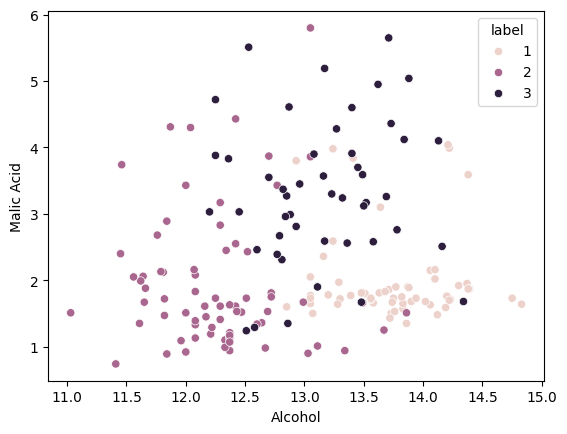

In [549]:
sns.scatterplot(wine,x=wine["Alcohol"],y=wine["Malic Acid"],hue=wine["label"])
plt.show()

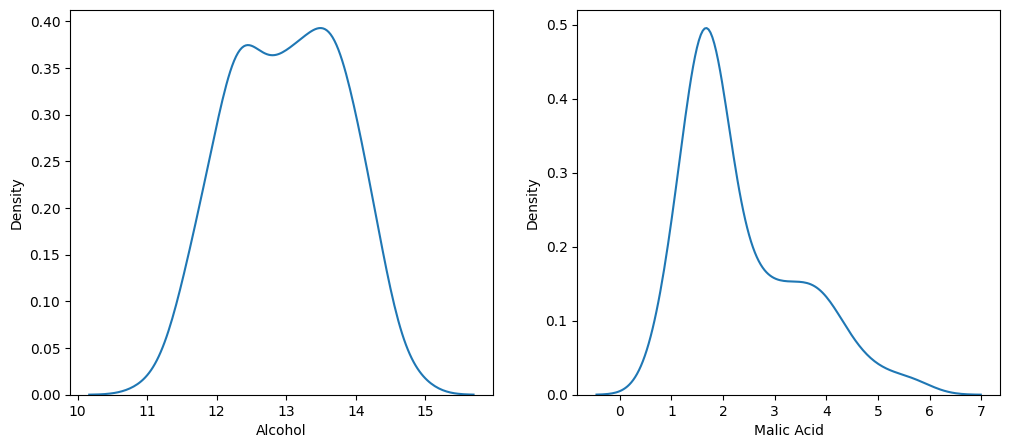

In [550]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))
sns.kdeplot(wine["Alcohol"],ax=ax1)
sns.kdeplot(wine["Malic Acid"],ax=ax2)
plt.show()

## first We do min - max scaling

In [551]:

X = wine.drop("label",axis=1)
y = wine["label"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(X,y,train_size=0.3,random_state=0,)

In [552]:
X_train.shape,X_test.shape

((53, 2), (125, 2))

In [553]:
class minmaxscaler():
    def __init__(self):
        pass

    def fit(self,X_train):
        X_range = (X_train.max()-X_train.min())
        X_min = X_train.min()

        X_norm = np.zeros(X_train.shape)
        X_train = np.array(X_train)
        for i in range(X_train.shape[0]):
            temp = (X_train[i][0] - X_min.iloc[0])/X_range.iloc[0]
            X_norm[i][0] = temp

        for i in range(X_train.shape[0]):
            temp = (X_train[i][1] - X_min.iloc[1])/X_range.iloc[1]
            X_norm[i][1] = temp

        return X_norm



In [554]:
min_max =  minmaxscaler()
X_norm_train = min_max.fit(X_train)
X_norm_test = min_max.fit(X_test)




In [555]:
X_norm_train  = pd.DataFrame(X_norm_train,columns=["Alcohol","Malic Acid"])
X_norm_test  = pd.DataFrame(X_norm_test,columns=["Alcohol","Malic Acid"])


In [556]:
np.round(X_norm_train.describe(),1)

,Alcohol,Malic Acid
count,53.0,53.0
mean,0.6,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.6,0.2
75%,0.8,0.5
max,1.0,1.0


In [557]:
np.round(X_norm_test.describe(),1)


,Alcohol,Malic Acid
count,125.0,125.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


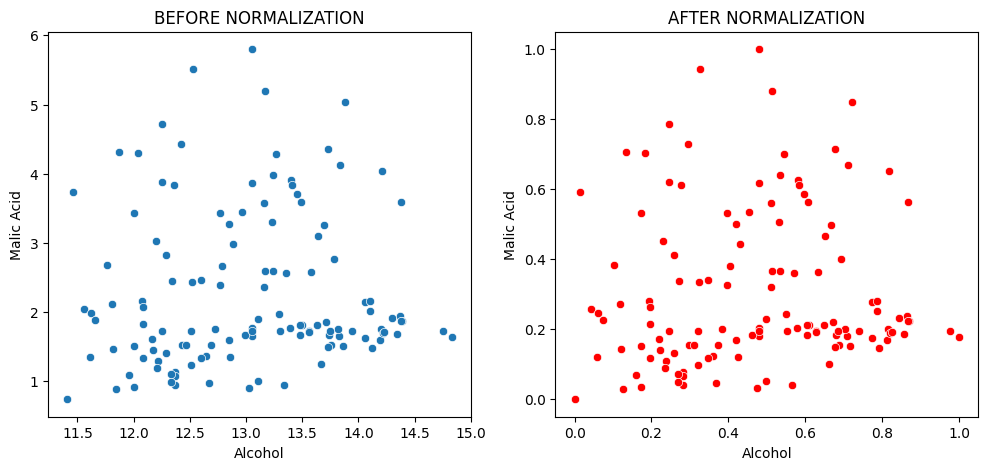

In [558]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))
ax1.set_title("BEFORE NORMALIZATION")
sns.scatterplot(X_test,x=X_test["Alcohol"],y=X_test["Malic Acid"],ax=ax1)

ax2.set_title("AFTER NORMALIZATION")
sns.scatterplot(X_norm_test,x=X_norm_test["Alcohol"],y=X_norm_test["Malic Acid"],ax=ax2,color = "red")
plt.show()

#Here the scale is shrunk down but the spread id almost same 

#this is the most used in the all normalization


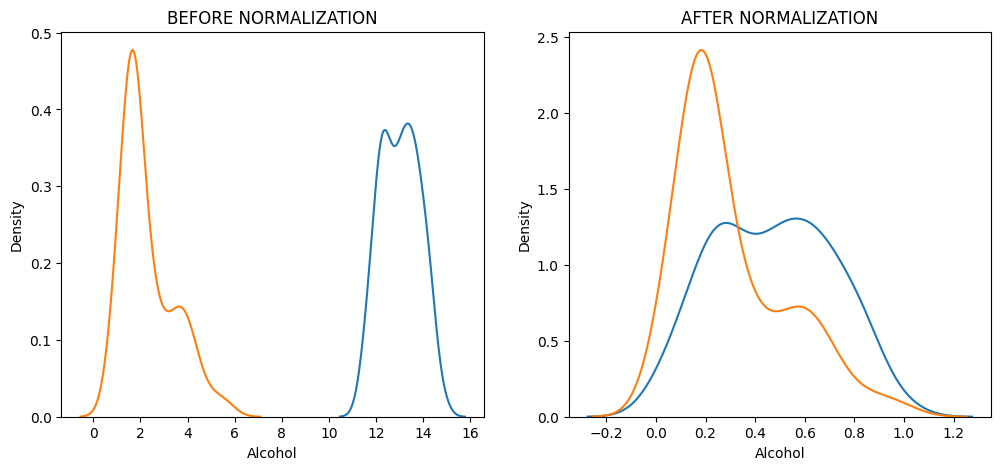

In [559]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))

ax1.set_title("BEFORE NORMALIZATION")
sns.kdeplot(X_test["Alcohol"],ax=ax1)
sns.kdeplot(X_norm_test["Alcohol"],ax=ax2)


ax2.set_title("AFTER NORMALIZATION")
sns.kdeplot(X_test["Malic Acid"],ax=ax1)
sns.kdeplot(X_norm_test["Malic Acid"],ax=ax2)


plt.show()

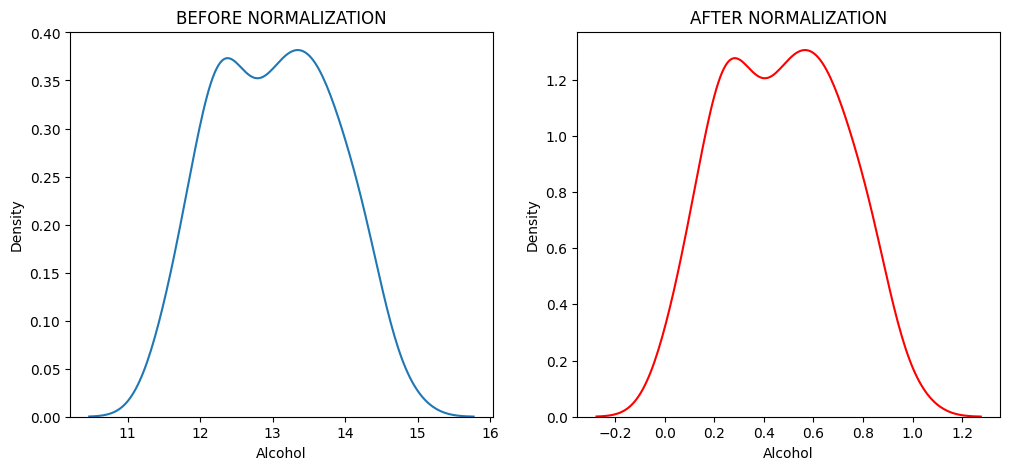

In [560]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))

ax1.set_title("BEFORE NORMALIZATION")
sns.kdeplot(X_test["Alcohol"],ax=ax1)
sns.kdeplot(X_norm_test["Alcohol"],ax=ax2,color="red")


ax2.set_title("AFTER NORMALIZATION")
# sns.kdeplot(X_test["Malic Acid"],ax=ax1)
# sns.kdeplot(X_norm_test["Malic Acid"],ax=ax2)


plt.show()

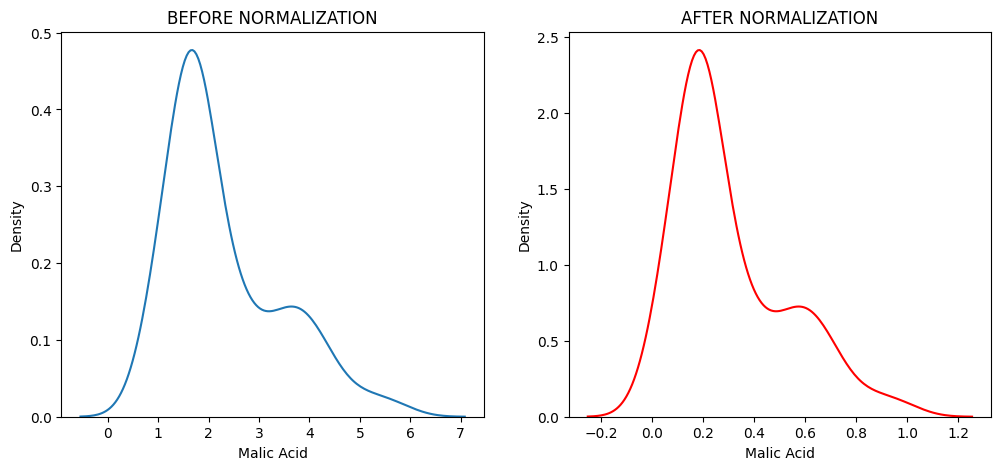

In [561]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))

ax1.set_title("BEFORE NORMALIZATION")
# sns.kdeplot(X_test["Alcohol"],ax=ax1)
# sns.kdeplot(X_norm_test["Alcohol"],ax=ax2)


ax2.set_title("AFTER NORMALIZATION")
sns.kdeplot(X_test["Malic Acid"],ax=ax1)
sns.kdeplot(X_norm_test["Malic Acid"],ax=ax2,color="red")


plt.show()

## Now we do the mean Normalization

In [562]:

class mean_normalization():
    def __init__(self):
        pass

    def fit(self,X_train):
        X_range = (X_train.max()-X_train.min())
        X_mean = X_train.mean()

        X_norm = np.zeros(X_train.shape)
        X_train = np.array(X_train)
        for i in range(X_train.shape[0]):
            temp = (X_train[i][0] - X_mean.iloc[0])/X_range.iloc[0]
            X_norm[i][0] = temp

        for i in range(X_train.shape[0]):
            temp = (X_train[i][1] - X_mean.iloc[1])/X_range.iloc[1]
            X_norm[i][1] = temp

        return X_norm



In [563]:
mn = mean_normalization()


X_mnorm_train = mn.fit(X_train)
X_mnorm_test = mn.fit(X_test)


In [564]:
X_mnorm_train = pd.DataFrame(X_mnorm_train,columns=X_norm_train.columns)
X_mnorm_test = pd.DataFrame(X_mnorm_test,columns=X_norm_train.columns)


In [565]:
np.round(X_mnorm_train.describe(),1)


,Alcohol,Malic Acid
count,53.0,53.0
mean,0.0,0.0
std,0.2,0.2
min,-0.6,-0.3
25%,-0.2,-0.2
50%,-0.0,-0.1
75%,0.2,0.2
max,0.4,0.7


In [566]:
np.round(X_mnorm_test.describe(),1)


,Alcohol,Malic Acid
count,125.0,125.0
mean,0.0,0.0
std,0.2,0.2
min,-0.5,-0.3
25%,-0.2,-0.1
50%,0.0,-0.1
75%,0.2,0.1
max,0.5,0.7


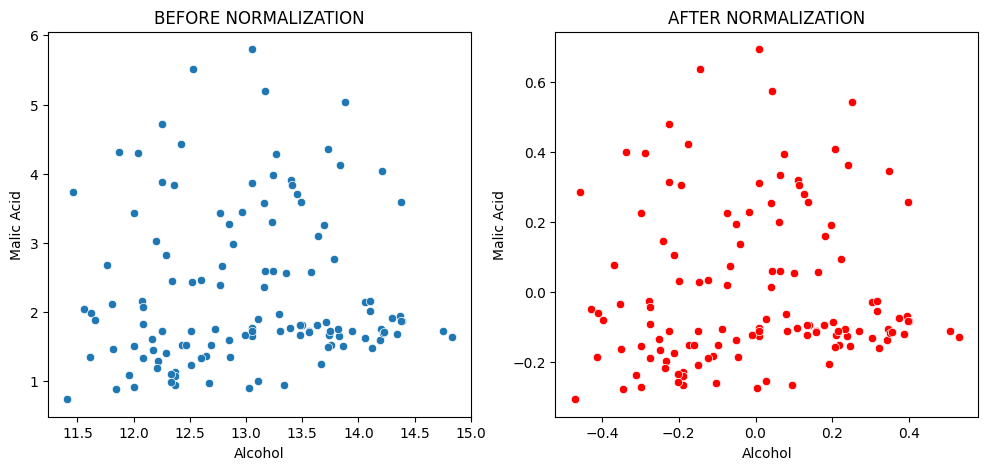

In [567]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))
ax1.set_title("BEFORE NORMALIZATION")
sns.scatterplot(X_test,x=X_test["Alcohol"],y=X_test["Malic Acid"],ax=ax1)

ax2.set_title("AFTER NORMALIZATION")
sns.scatterplot(X_mnorm_test,x=X_mnorm_test["Alcohol"],y=X_mnorm_test["Malic Acid"],ax=ax2,color = "red")
plt.show()

# This is normalization method is more centred 
# this isnt used much if centered data is preffered we use 
# Standadization
  

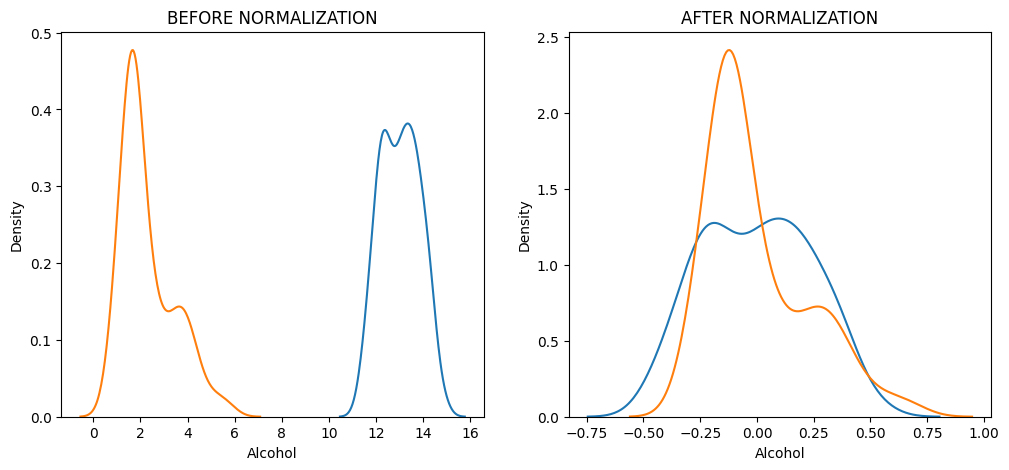

In [568]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))

ax1.set_title("BEFORE NORMALIZATION")
sns.kdeplot(X_test["Alcohol"],ax=ax1)
sns.kdeplot(X_mnorm_test["Alcohol"],ax=ax2)


ax2.set_title("AFTER NORMALIZATION")
sns.kdeplot(X_test["Malic Acid"],ax=ax1)
sns.kdeplot(X_mnorm_test["Malic Acid"],ax=ax2)


plt.show()

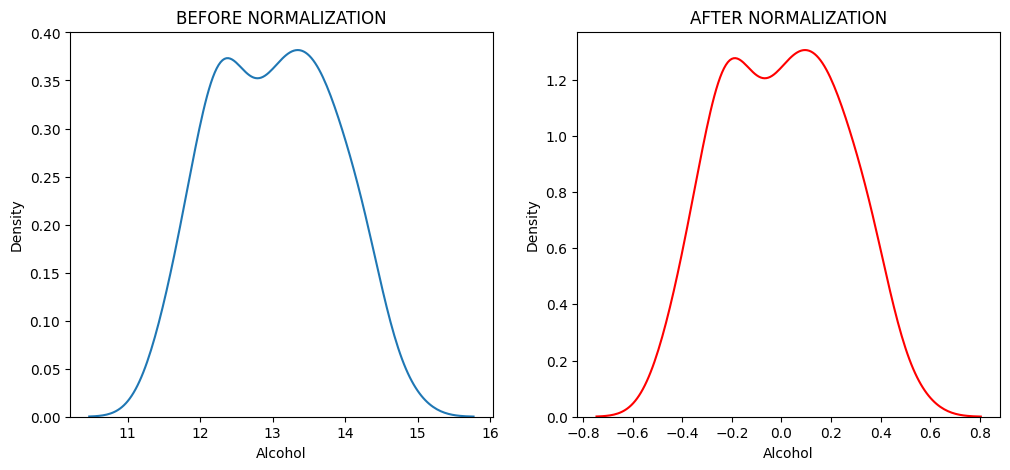

In [569]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))

ax1.set_title("BEFORE NORMALIZATION")
sns.kdeplot(X_test["Alcohol"],ax=ax1)
sns.kdeplot(X_mnorm_test["Alcohol"],ax=ax2,color="red")


ax2.set_title("AFTER NORMALIZATION")
# sns.kdeplot(X_test["Malic Acid"],ax=ax1)
# sns.kdeplot(X_norm_test["Malic Acid"],ax=ax2)


plt.show()

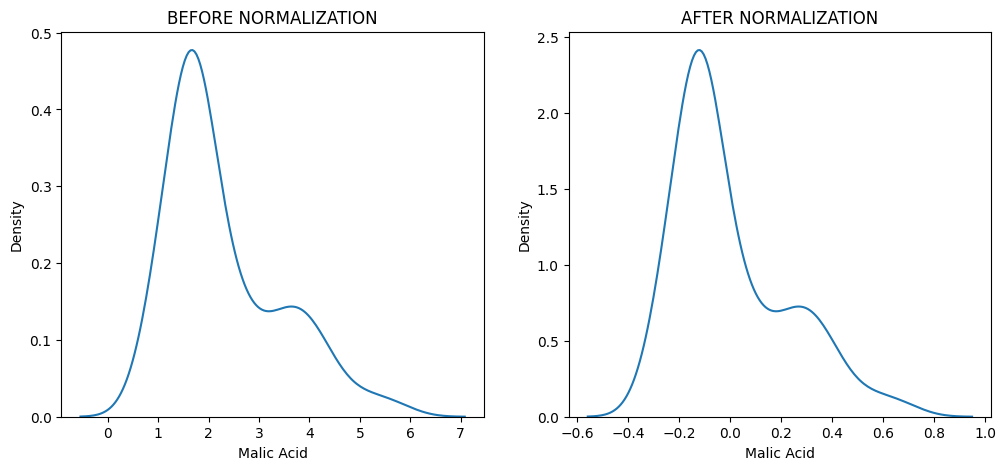

In [570]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))

ax1.set_title("BEFORE NORMALIZATION")
# sns.kdeplot(X_test["Alcohol"],ax=ax1)
# sns.kdeplot(X_norm_test["Alcohol"],ax=ax2,color="red")


ax2.set_title("AFTER NORMALIZATION")
sns.kdeplot(X_test["Malic Acid"],ax=ax1)
sns.kdeplot(X_mnorm_test["Malic Acid"],ax=ax2)


plt.show()

## Max Absolute Scalling

In [574]:
class max_abs_scalling():
    def __init__(self):
        pass

    def fit(self,X_train):
        
        max = 0

        if np.abs(X_train.max()).iloc[0] > np.abs(X_train.min()).iloc[0]:
            max  = np.abs(X_train.max())

        elif np.abs(X_train.max()).iloc[0] > np.abs(X_train.min()).iloc[0]:
            max  = np.abs(X_train.max())

        else:
            max = np.abs(X_train.min())
        if np.abs(X_train.max()).iloc[1] > np.abs(X_train.min()).iloc[1]:
            max  = np.abs(X_train.max())

        elif np.abs(X_train.max()).iloc[1] > np.abs(X_train.min()).iloc[1]:
            max  = np.abs(X_train.max())

        else:
            max = np.abs(X_train.min())

        X_norm = np.zeros(X_train.shape)
        X_train = np.array(X_train)
        for i in range(X_train.shape[0]):
            temp = (X_train[i][0])/max.iloc[0]
            X_norm[i][0] = temp

        

        for i in range(X_train.shape[0]):
            temp = (X_train[i][1])/max.iloc[1]
            X_norm[i][1] = temp

        return X_norm


In [575]:
mas = max_abs_scalling()

X_abs_train = mas.fit(X_train)
X_abs_test = mas.fit(X_test)



In [576]:
X_abs_train = pd.DataFrame(X_abs_train,columns=X_train.columns)
X_abs_test = pd.DataFrame(X_abs_test,columns=X_train.columns)


In [577]:
np.round(X_abs_train.describe(),1)

,Alcohol,Malic Acid
count,53.0,53.0
mean,0.9,0.4
std,0.1,0.2
min,0.8,0.2
25%,0.9,0.3
50%,0.9,0.3
75%,1.0,0.6
max,1.0,1.0


In [578]:
np.round(X_abs_train.describe(),1)


,Alcohol,Malic Acid
count,53.0,53.0
mean,0.9,0.4
std,0.1,0.2
min,0.8,0.2
25%,0.9,0.3
50%,0.9,0.3
75%,1.0,0.6
max,1.0,1.0


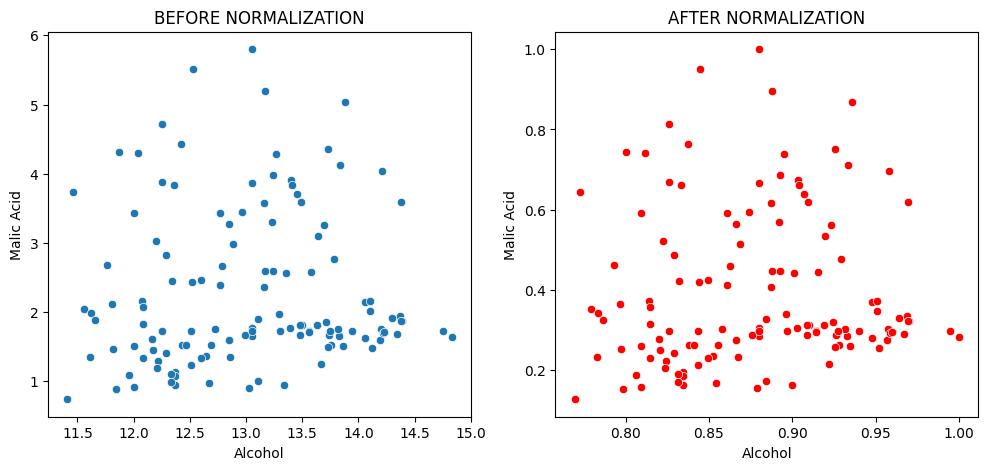

In [579]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))
ax1.set_title("BEFORE NORMALIZATION")
sns.scatterplot(X_test,x=X_test["Alcohol"],y=X_test["Malic Acid"],ax=ax1)

ax2.set_title("AFTER NORMALIZATION")
sns.scatterplot(X_abs_test,x=X_abs_test["Alcohol"],y=X_abs_test["Malic Acid"],ax=ax2,color = "red")
plt.show()